# Hashtag Analysis

## Importing Packages

In [50]:
import tweepy
import configparser
import pandas as pd

## Initial Configurations

In [51]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [52]:
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

In [53]:
auth = tweepy.OAuth2AppHandler(
    api_key ,
    api_key_secret
)
api = tweepy.API(auth)

## Fetching Data

In [54]:
keywords = '#HarGharTiranga'
limit=10000

In [55]:
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode='extended').items(limit)

In [56]:
tweets

In [57]:
columns = ['UserID', 'Name', 'Tweet', 'Mentions','Created At','Retweet', 'Likes','Location']
data = []

In [58]:
for tweet in tweets:
    #print(tweet._json)
    tweet_mentions=[]
    a=tweet.entities
#     print(a[0][3]['user_mentions'])
    data.append([tweet.user.screen_name, tweet.user.name, tweet.full_text, tweet.entities, tweet.created_at, None, tweet.favorite_count, tweet.user._json["location"]])

In [59]:
df = pd.DataFrame(data, columns=columns)
df.head(3)

,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location
0,BikramS32589057,Bikram Singh,RT @Heroofkashmir: Across the country our Tira...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2022-08-19 16:10:19+00:00,None,0,
1,Mohdkas66160822,Mohd kashif,RT @munawar0018: Jahan mai yaad rahe tu 🇮🇳 hap...,"{'hashtags': [{'text': 'india', 'indices': [70...",2022-08-19 16:10:16+00:00,None,0,
2,BabarAl83836207,Babar Ali,RT @DALuv_e_Kashmir: Beauty of #NayaKashmir is...,"{'hashtags': [{'text': 'NayaKashmir', 'indices...",2022-08-19 16:10:14+00:00,None,0,


In [60]:
#data

## Extracting User Mentions and Retweet Status

In [61]:
for i in range(len(data)):
    
    #extracting mentions
    
    tempMention=[data[i][3]['user_mentions'][j]['name'] for j in range(len(data[i][3]['user_mentions']))]
    #print(tempMention)
    data[i][3]=tempMention
    
    #extracting retweet status and updating tweet content
    tempTxt=data[i][2][:2]
    if tempTxt=="RT":
        data[i][5]=1
        data[i][2]=data[i][2][3:]
    else:
        data[i][5]=0

In [62]:
df = pd.DataFrame(data, columns=columns)
df

,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location
0,BikramS32589057,Bikram Singh,@Heroofkashmir: Across the country our Tiranga...,[Freedom Fighter],2022-08-19 16:10:19+00:00,1,0,
1,Mohdkas66160822,Mohd kashif,@munawar0018: Jahan mai yaad rahe tu 🇮🇳 happy ...,[munawar faruqui],2022-08-19 16:10:16+00:00,1,0,
2,BabarAl83836207,Babar Ali,@DALuv_e_Kashmir: Beauty of #NayaKashmir is st...,[Arshi🍁Wani☃️Kaaju🌏],2022-08-19 16:10:14+00:00,1,0,
3,AyushBhankhar,Ayush Bhankhar,@DSSNewsUpdates: DSS volunteers are proudly co...,[Dera Sacha Sauda],2022-08-19 16:10:08+00:00,1,0,
4,Paramje39258070,Paramjeet Saini,"@officialmsgfans: While hoisting the flag, fol...",[MSG Fan Club],2022-08-19 16:09:55+00:00,1,0,
...,...,...,...,...,...,...,...,...
9995,MirMohs14911829,Syed Tarkaan,#HarGharTiranga\n#MeraTirangaMeriShaan\n#Kashm...,[],2022-08-19 02:36:25+00:00,0,0,
9996,SartajPal3,rangga kabaddi,"@DALuv_e_Kashmir: Pari Mahal, #Kashmir is gett...",[Arshi🍁Wani☃️Kaaju🌏],2022-08-19 02:36:24+00:00,1,0,
9997,MirMohs14911829,Syed Tarkaan,#HarGharTiranga\n#MeraTirangaMeriShaan\n#Kashm...,[],2022-08-19 02:36:18+00:00,0,0,
9998,SartajPal3,rangga kabaddi,@ChinarcorpsIA: Wreath laying at Chinar War Me...,[Chinar Corps🍁 - Indian Army],2022-08-19 02:36:15+00:00,1,0,


In [63]:
df.to_csv('twitter_data.csv')

In [64]:
df["UserID"].value_counts()

nykkinnaur         152
gujaratbjp148      110
Andhravilasnews     98
Inkhuanguang_RD     93
AditiRa1502         91
                  ... 
RebellionTweet       1
premkumar11221       1
Sasmita53390763      1
LipikaD83227508      1
SudhaBrijvasi        1
Name: UserID, Length: 3855, dtype: int64

In [65]:
df["Retweet"].value_counts()

1    9480
0     520
Name: Retweet, dtype: int64

## Visualizing data

In [70]:
topUsers=df["UserID"].value_counts()[:10]
topUsers

nykkinnaur         152
gujaratbjp148      110
Andhravilasnews     98
Inkhuanguang_RD     93
AditiRa1502         91
KapurthalaNyk       88
Heemraj19           73
Nykuttarkashi       69
LaxmanM64061588     68
RohitBillawar       67
Name: UserID, dtype: int64

In [69]:
import matplotlib.pyplot as plt

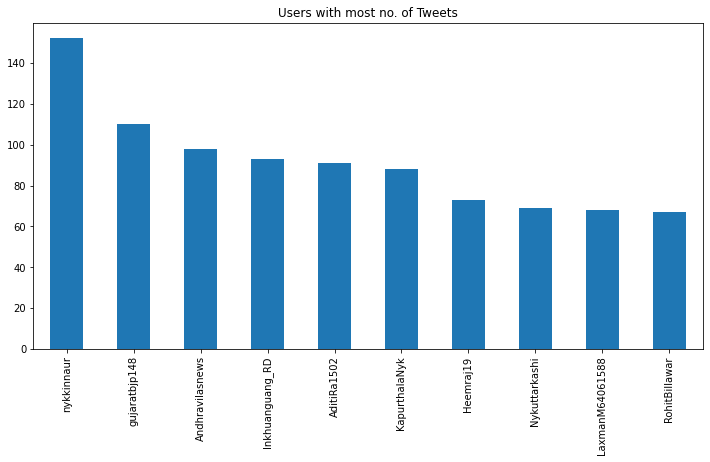

In [81]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()